In [6]:
import pandas as pd
import numpy as np
import requests
import json
import math
import geopandas as gpd
import folium
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from folium import Choropleth, Marker
from folium.plugins import HeatMap, MarkerCluster, HeatMapWithTime
import streamlit as st
from streamlit_folium import st_folium


## Importing the CSVs

In [44]:
listings_df = pd.read_csv('listings.csv')
neighbourhoods_geoj = gpd.read_file('neighbourhoods.geojson')
woz_df = pd.read_csv('woz.csv')
personen_df = pd.read_csv('personen.csv')
ratings_df = pd.read_csv('PriceRatingDF.csv')
reviews_details_df = pd.read_csv('reviews_details.csv')
listings_woz = pd.read_csv('listings_woz.csv')
conclusie = pd.read_csv('conclusie.csv')

In [8]:
ratings_df = ratings_df.rename(columns={'review_scores_rating':'Review score', 'positive':'Review score model', 'price':'Prijs'})

## Maps

In [10]:
m1 = folium.Map(location=[52.37,4.89], tiles='cartodbpositron', zoom_start=12)

HeatMap(data=listings_df[['latitude', 'longitude']], radius=15, min_opacity=0.3).add_to(m1)

In [11]:
price = listings_df.groupby('neighbourhood').price.mean()
#availability = listings_df.groupby('neighbourhood').availability_365.mean()
gemwoz = listings_woz.groupby('neighbourhood')['gemiddelde WOZ-waarde'].mean()
neighbourhoods_geoj.set_index('neighbourhood', inplace=True)

m2 = folium.Map(location=[52.37,4.89], tiles='cartodbpositron', zoom_start=11)

# Choropleth(geo_data = neighbourhoods_geoj['geometry'], 
#            data=price, 
#            key_on="feature.id", 
#            fill_color='BrBG', 
#            legend_name='Gemiddelde prijs (€)'
#           ).add_to(m2)

## Titels

In [12]:
st.set_page_config(
    page_title="VA Eind")

In [13]:
st.title('Welke factoren kunnen de Airbnb prijs in Amsterdam beïnvloeden?')

2022-11-10 12:26:21.916 
  command:

    streamlit run C:\Users\Tim Rentenaar\anaconda3\envs\geo_env\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [14]:
h1, h2, h3, h4, h5, h6 = st.tabs(['Inleiding','Gebruikte datasets','Locatie & Huisprijs','Reviews','Aantal Personen','Conclusie'])

### H1 Inleiding

In [15]:
from PIL import Image

In [16]:
with h1:
    st.header('Inleiding')
    st.text('''Dit is een dashboard van het onderzoek naar de AIRBNB prijs in Amsterdam. Er wordt
gekeken naar welke factoren de grootste invloed kunnen hebben op deze prijs. De data
die gebruikt is tijdens het onderzoek komt van Kaggle en bevat data over de AIRBNB 
situatie op 6 december 2018.''')
    
    image = Image.open('Airbnb.jpg')
    st.image(image, width=700)

    st.text('''De verwachte uitkomst van het onderzoek is dat de Huisprijs, Reviews en Aantal 
Personen de grootste invloed hebben op de AIRBNB prijs. In de volgende slides zal 
hier meer over verteld worden, maar eerst zullen de datasets verduidelijkt worden.''')

### H2 Gebruikte datasets

In [17]:
with h2:
    st.header('Gebruikte datasets')
    st.text('''De datasets die gebruikt worden tijdens het onderzoek bevatten locaties, prijs en
reviews van de AIRBNB's in Amsterdam. Hieronder zijn kleine delen van de gebruikte 
datasets te zien.''')
    
    ### DATAFRAMES ###
    st.write('listings.csv, van kaggle.com binnengehaald met de Kaggle API [link](https://www.kaggle.com/datasets/erikbruin/airbnb-amsterdam?select=listings.csv)')
    listings_df_head=listings_df.head()
    st.dataframe(listings_df_head)
    
    reviews_details_drop = reviews_details_df.drop('Unnamed: 0', axis=1)
    st.write('reviews_details.csv, van kaggle.com binnengehaald met de Kaggle API [link](https://www.kaggle.com/datasets/erikbruin/airbnb-amsterdam?select=listings.csv)')
    st.dataframe(reviews_details_drop)
    
    st.write('woz.xlsx, van data.amsterdam.nl binnengehaald met API [link](https://data.amsterdam.nl/datasets/03G1QUEsOQ2Xkw/woningmarkt-amsterdam/)')
    woz_df_head = woz_df[['gebied','gemiddelde WOZ-waarde','gemiddelde WOZ-waarde per m2']].head()
    st.dataframe(woz_df_head)


### H3 Locatie + WOZ

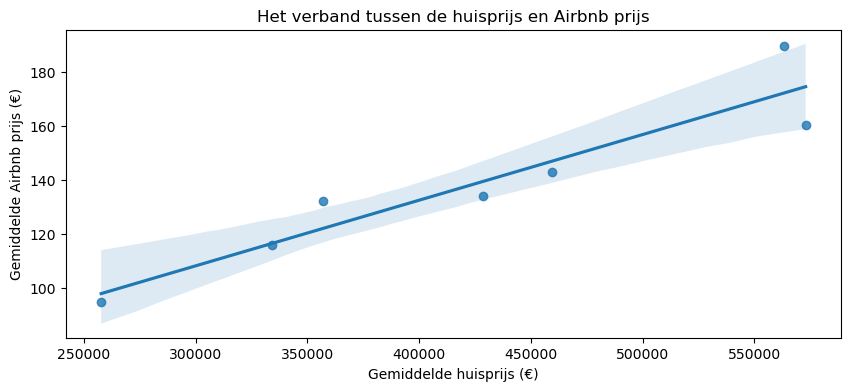

In [18]:
with h3:
    st.header('Locatie & Huisprijs')
    st.text('''Om te bepalen in welke maten de locatie van de AIRBNB een correlatie heeft met de  
prijs is de locatiedata van de AIRBNB's van groot belang. Met de LAT en LNG 
variabelen kan er in kaart gebracht worden waar in Amsterdam de AIRBNB's gevestigd 
zijn. Verder wordt hier gebruik gemaakt van de WOZ dataset, waarin de gemiddelde 
prijs van panden per buurt zijn beschreven. Hiermee kan bepaald worden wat de 
invloed is van de huisprijs op de prijs van de AIRBNB. ''')
    
    option = st.selectbox('Welke kaart?', ('Heatmap','Choropleth'))
    
    if option == 'Heatmap':
        st_data = st_folium(m1, width=700)
    elif option == 'Choropleth':
        option2 = st.selectbox('Wat wil je zien?', ('Gemiddelde Airbnb prijs','Gemiddelde huisprijs'))
        if option2 == 'Gemiddelde Airbnb prijs':
            Choropleth(geo_data = neighbourhoods_geoj['geometry'], 
                       data=price, 
                       key_on="feature.id", 
                       fill_color='YlOrRd', 
                       legend_name='Gemiddelde Airbnb prijs (€)'
                      ).add_to(m2)
        elif option2 == 'Gemiddelde huisprijs':
            Choropleth(geo_data = neighbourhoods_geoj['geometry'], 
                       data=gemwoz, 
                       key_on="feature.id", 
                       fill_color='YlOrRd', 
                       legend_name='Gemiddelde Huisprijs (€)'
                      ).add_to(m2)
        st_data = st_folium(m2, width=700)
    
    st.text('''Op de bovenstaande kaart staan alle AIRBNB's in Amsterdam, gesorteerd op AIRBNB 
prijs per nacht. Uit de kaart blijkt dat de AIRBNB prijs per nacht in het centrum
van Amsterdam het hoogste is, en hoe verder de AIRBNB buiten het centrum zit hoe 
goedkoper het wordt.''')
    
    fig = plt.figure(figsize=(10,4))
    sns.regplot(data=woz_df, x='gemiddelde WOZ-waarde', y='gemiddelde Airbnb prijs').set(title='Het verband tussen de huisprijs en Airbnb prijs', xlabel='Gemiddelde huisprijs (€)', ylabel='Gemiddelde Airbnb prijs (€)')
    st.pyplot(fig)
    
    corr_matrix = np.corrcoef(woz_df['gemiddelde WOZ-waarde'], woz_df['gemiddelde Airbnb prijs'])
    corr = corr_matrix[0,1]
    R_sq = corr**2
    
    st.code('''corr_matrix = np.corrcoef(woz_df['gemiddelde WOZ-waarde'], woz_df['gemiddelde Airbnb prijs'])
corr = corr_matrix2[0,1]
R_sq = corr**2
R_sq''')
    
    st.write("Coefficient of determination: ", R_sq)
    
    st.text('''In de bovenstaande regressieplot is de relatie tussen de huisprjis en AIRBNB prijs 
weergeggeven, en hieruit blijkt dat er een hele mooie lineaire regressielijn 
getekend kan worden tussen de puntenvan de scatterplot. De AIRBNB prijs hangt dus 
zeker af van de huisprijs. In de volgende slide wordt gekeken of de reviews een 
correlatie hebben met de AIRBNB prijs.''')

### H4 Reviews

In [19]:
with h4:
    st.header('Reviews')
    st.text('''Voor het onderzoek is er van uit gegaan dat de reviews een grote invloed hebben op  
de AIRBNB prijs. Er is tijdens het onderzoek veel tijd besteed om de reviews goed   
in kaart te brengen. Er zijn in totaal 430k reviews achtergelaten op AIRBNB's in
Amsterdam, en hiervan is een grote dataset beschikbaar. Het probleem met deze
dataset is dat er geen score van de review beschikbaar was, alleen een comment. Met
de Spacy package was het mogelijk om deze comments om te zetten naar positieve/
negatieve reviews om zo een score per review te bepalen. Uiteindelijk waren er wel
gemiddelde scores per AIRBNB adres beschikbaar. Deze scores zijn verder gebruikt in
het onderzoek om te kijken wat de correlatie is tussen de AIRBNB prijs en de reviews,
maar eerst wordt er gekeken of de Spacy package de comments accuraat heeft omgezet
naar positief/negatief.''')
    
    ### DATAFRAME ###
    image1 = Image.open('image1.png')
    st.image(image1, width=300)
    
    st.text('''Hierboven is het dataframe te zien waarin de Polarity score is berekend. Aangezien
deze score per review is weergeven, moet dit dataframe gesorteerd worden per AIRBNB
locatie. ''')
    
    ### DATAFRAME ###
    image2 = Image.open('image2.png')
    st.image(image2, width=300)
    
    st.text('''Nu de Polarity per adres bekend is, kan er gekeken worden of het Spacy package de
comments accuraat omgezet heeft naar Polarity.''')
    
    ### DATAFRAME ###
    image3 = Image.open('image3.png')
    st.image(image3, width=300)
    
    st.text('''In dit dataframe zijn de berekende review score en werkelijke score per AIRBNB
locatie weergeven. De spreiding van beide scores is hieronder weergegeven in een
boxplot.''')
    
    ### BOXPLOT ###
    ratings_model_melted = pd.melt(ratings_df[['Review score model','Review score']])
    
    fig4 = plt.figure(figsize=(10,4))
    sns.boxplot(y='variable',x='value',data=ratings_model_melted).set(title='Verdeling van review scores uit het model en originele review scores', xlabel='Review waarde', ylabel='Review types')
    st.pyplot(fig4)
    
    st.text('''Uit de boxplot blijkt ook dat de scores overeenkomen, aangezien beide boxen boven 
elkaar liggen. Dit is verder ook te zien in de volgende boxplot, waar de spreiding
van de accuracy weergeven is.''')
    
    ### BOXPLOT ###
    fig6 = plt.figure(figsize=(10,4))
    sns.boxplot(data=ratings_df, x='accuracy').set(title='Spreiding van de accuracy van het model', xlabel='Accuracy', ylabel='Review scores model')
    st.pyplot(fig6)
    
    st.text('''Ook in de accuracy boxplot is te zien dat de volledige boxplot binnen de +10 en -10
valt, dus dat betekent dat de accuracy van de Spacy package heel hoog is (later
uitgerekend: 93% van de gegenereerde getallenn liggen +10 of -10 bij de echte waarde
vandaan).''')
    
    st.text('''Verder is er gekeken of er een relatie is tussen de AIRBNB review-score en de AIRBNB
prijs. Deze is weergegeven in de Scatterplot.''')
    
    ### SCATTERPLOT ###
    
    fig5 = plt.figure(figsize=(10,4))
    sns.scatterplot(data=ratings_df, x='Review score', y='Prijs').set(title='Het verband tussen de review scores en de Airbnb prijs', xlabel='Review score', ylabel='Prijs (€)')
    st.pyplot(fig5)
    
    st.text('''Uit de scatterplot is geen duidelijke relatie te vinden tussen de review score en de 
prijs. Alle dots liggen verspreid door de plot en er is geen duidelijke trend te 
vinden.''')

### H5 Aantal Personen

In [20]:
with h5:
    st.header('Aantal personen')
    st.text('''De relatie tussen het aantal personen in een AIRBNB locatie en de AIRBNB prijs wordt
in dit deel onder de loep genomen. Eerst wordt er gekeken naar de verdeling van het
aantal personen per AIRBNB locatie.''')
    
    xrange = st.slider('X bereik',0,8,18)
    
    fig2 = plt.figure(figsize=(10,4))
    plt.hist(personen_df['accommodates'], bins=10)
    plt.title('Verdeling van aantal personen')
    plt.xlabel('Aantal personen')
    plt.ylabel('Aantal')
    plt.xlim([0,xrange])
    st.pyplot(fig2)
    
    st.text('''Uit de histogram blijkt dat de 2 persoons AIRBNB het meest voorkomt in Amsterdam. En 
hoe meer personen in de AIRBNB kunnen, hoe minder deze voorkomen. Nu wordt er een 
regressieplot gemaakt tussen het aantal personen en de prijs.''')
    
    fig3, ax3 = plt.subplots()
    sns.regplot(data=personen_df, x='accommodates', y='price', scatter_kws={'alpha':0.25}, x_jitter=0.1).set(title='Verband tussen het aantal personen en de Airbnb prijs', xlabel='Aantal personen', ylabel='Prijs (€)')
    ax3.set_xlim(0,xrange)
    st.pyplot(fig3)
    
    st.text('''Uit de bovenstaande regressieplot blijkt dat er correlatie is tussen het aantal 
personen per AIRBNB en de prijs van de AIRBNB, want hoe meer personen er in de AIRBNB 
kunnen hoe hoger de prijs wordt.''')

### H6 Conclusie

In [21]:
with h6:
    st.header('Conclusie')
    st.text('''- Er is een duidelijke relatie tussen het aantal personen per AIRBNB 
  en de AIRBNB prijs.
- Er is geen duidelijke relatie tussen de review-score en de AIRBNB prijs.
- Er is een sterke relatie tussen de gemiddelde huizenprijs 
  en de gemiddelde AIRBNB prijs per stadsdeel.
- Het Spacy model werkte heel goed!''')
    
    conclusie = conclusie.drop('Unnamed: 0', axis=1)
    
    figconc = plt.figure(figsize=(10,4))
    sns.heatmap(data=conclusie.corr(), cmap = "YlGnBu", annot=True, fmt=".2f").set(title='De correlatie tussen de Airbnb prijs en de factoren')
    st.pyplot(figconc)